<a href="https://colab.research.google.com/github/SatriyaPratama/Bengkel-Koding/blob/main/Bengkod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UAS
Muhammad Satriya Pratama M.K.
(A11.2022.14225)

# Persiapan

In [45]:
# Mount Google Drive
# Langkah ini bertujuan untuk menghubungkan Google Colab dengan Google Drive
# sehingga kita bisa membaca file yang ada di Drive (misalnya, "adult.csv").
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score


# Exploratory Data Analysis (EDA)

In [47]:
#Load Dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/BengKod/ObesityDataSet.csv'

df = pd.read_csv(file_path)

# Tampilkan beberapa baris dataset
print("=== 5 Baris Pertama Dataset ===")
df.head(5)

=== 5 Baris Pertama Dataset ===


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [48]:
#Informasi umum dataset
print("\n=== Informasi Dataset ===")
df.info()


=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                  

In [49]:
# Deskripsi statistik untuk fitur numerik
print("\n=== Descriptive Statistics (Numerik) ===")
df.describe()


=== Descriptive Statistics (Numerik) ===


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [50]:
# Descriptive statistics untuk fitur kategorikal
print("\n=== Descriptive Statistics (Kategorikal) ===")
df.describe(include=['object', 'category'])


=== Descriptive Statistics (Kategorikal) ===


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [51]:
# Cek missing values per kolom
print("\n=== Missing Values per Kolom ===")
print(df.isnull().sum())


=== Missing Values per Kolom ===
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [52]:
# Cek jumlah nilai unik per kolom
print("\n=== Jumlah Nilai Unik per Kolom ===")
print(df.nunique())



=== Jumlah Nilai Unik per Kolom ===
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [53]:
# Cek data duplikat
num_duplicates = df.duplicated().sum()
print(f"\nJumlah Baris Duplikat: {num_duplicates}")



Jumlah Baris Duplikat: 18


In [54]:
# Cek keseimbangan target
print("\n=== Distribusi Kelas Target (NObeyesdad) ===")
print(df['NObeyesdad'].value_counts())


=== Distribusi Kelas Target (NObeyesdad) ===
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


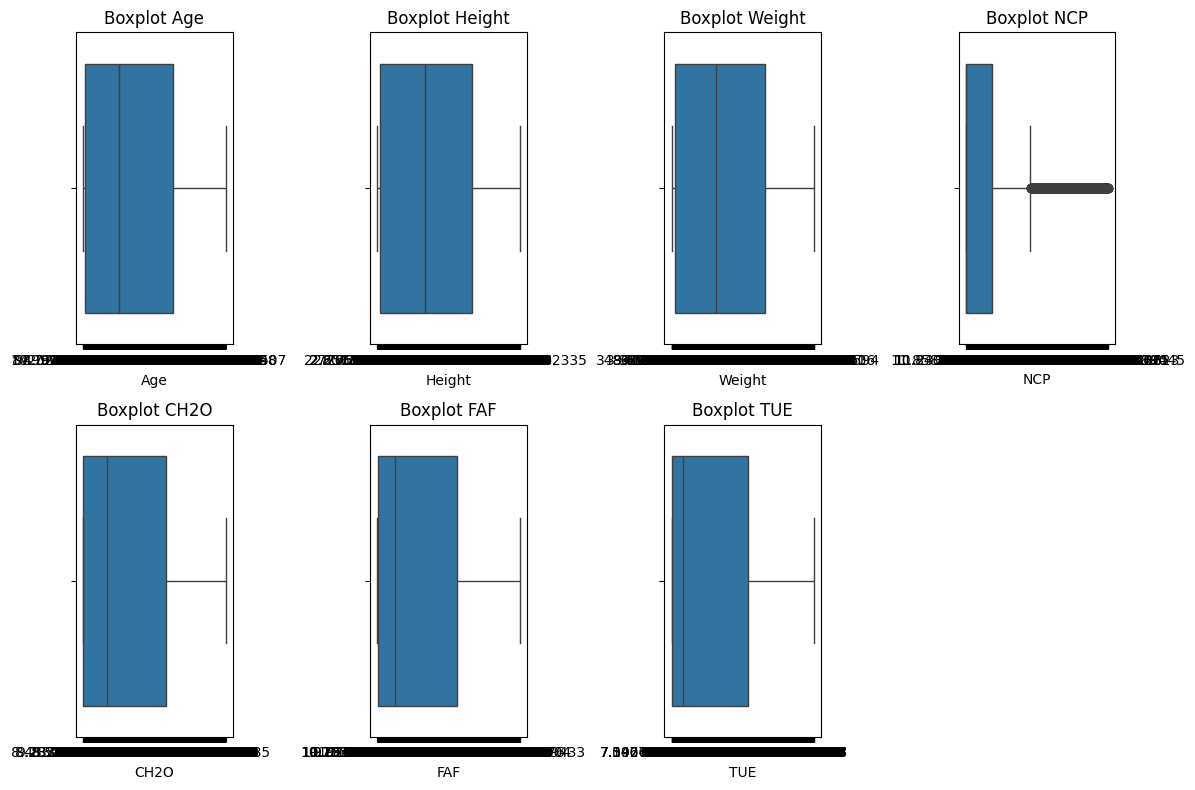

In [55]:
# Boxplot untuk variabel kontinu
kontinu_cols = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']
valid_continuous = [col for col in kontinu_cols if col in df.columns]
plt.figure(figsize=(12, 8))
for i, col in enumerate(valid_continuous, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=col, orient='h')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

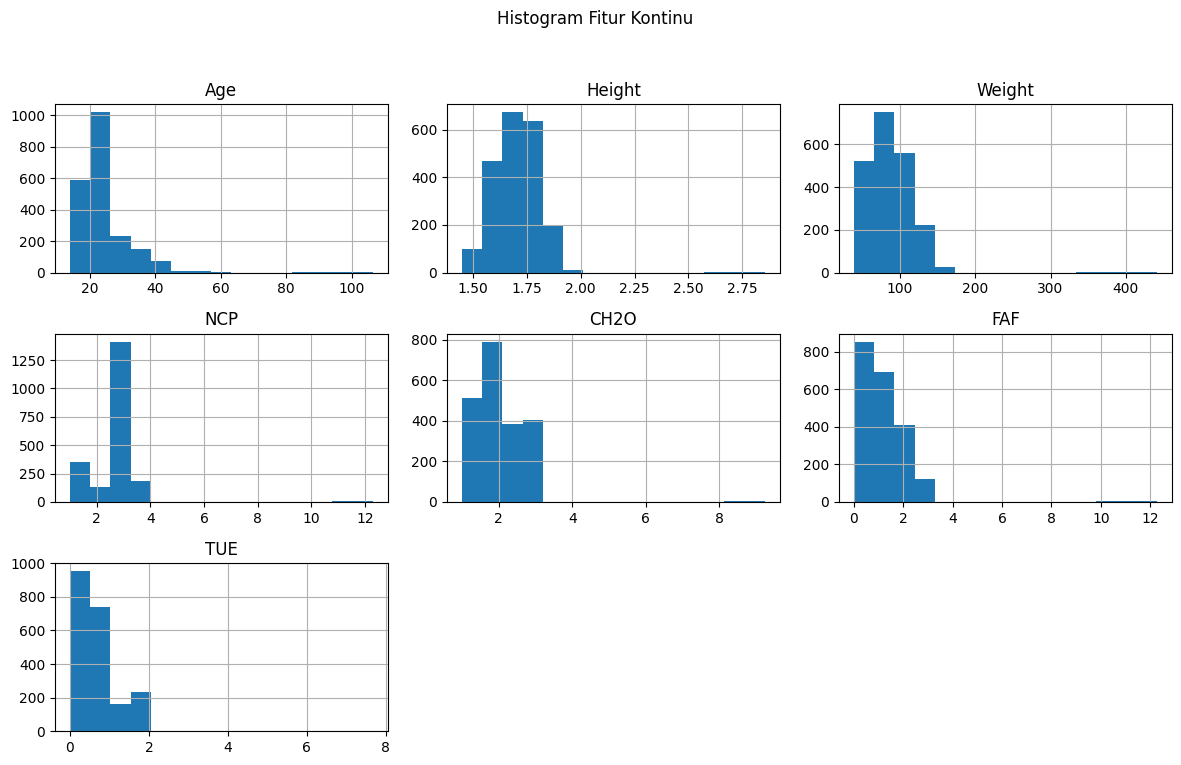

In [56]:
valid_cols = [col for col in kontinu_cols if col in df.columns]
for col in valid_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plt.figure(figsize=(12, 8))
if valid_cols:
    df[valid_cols].hist(bins=15, figsize=(12, 8))
    plt.suptitle('Histogram Fitur Kontinu')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


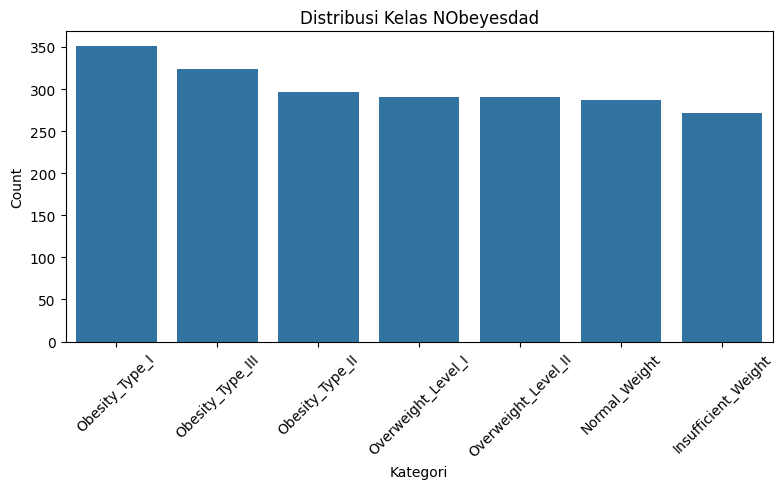

In [57]:
# Countplot untuk target
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kelas NObeyesdad')
plt.ylabel('Count')
plt.xlabel('Kategori')
plt.tight_layout()
plt.show()

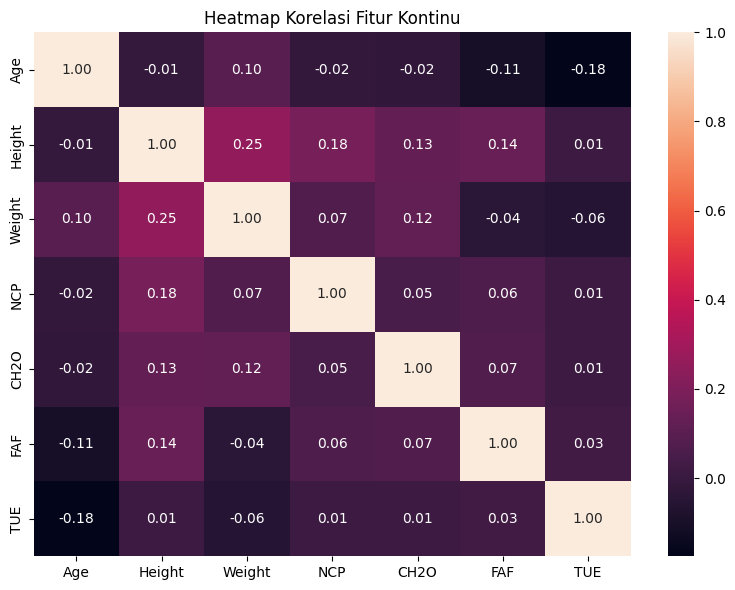

In [58]:
# Heatmap korelasi fitur kontinu
plt.figure(figsize=(8, 6))
if valid_cols:
    corr_matrix = df[valid_cols].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f")
    plt.title('Heatmap Korelasi Fitur Kontinu')
    plt.tight_layout()
    plt.show()


Pada tahap Exploratory Data Analysis (EDA), ditemukan bahwa tantangan utama adalah kualitas data, di mana banyak kolom numerik terbaca sebagai object dan terdapat sedikit data yang hilang serta duplikat. Namun, distribusi kelas pada variabel target NObeyesdad teridentifikasi relatif seimbang, yang merupakan kondisi ideal untuk pemodelan klasifikasi.

# Preprocessing

In [59]:
# Pisahkan fitur (X) dan target (y)
target_col = 'NObeyesdad'
X = df.drop(columns=[target_col])
y = df[target_col].copy()
print(f"Shapes – X: {X.shape}, y: {y.shape}")

Shapes – X: (2111, 16), y: (2111,)


In [60]:
# Identifikasi kolom numerik dan kategorikal
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Konversi kolom yang seharusnya numerik ke tipe data float
for col in numerical_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')

print("\nInfo Tipe Data Kolom Numerik Setelah Konversi:")
X[numerical_cols].info()



Info Tipe Data Kolom Numerik Setelah Konversi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2089 non-null   float64
 1   Height  2089 non-null   float64
 2   Weight  2092 non-null   float64
 3   FCVC    2093 non-null   float64
 4   NCP     2089 non-null   float64
 5   CH2O    2096 non-null   float64
 6   FAF     2092 non-null   float64
 7   TUE     2096 non-null   float64
dtypes: float64(8)
memory usage: 132.1 KB


In [61]:
#Menangani missing values
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

X[numerical_cols] = imputer_num.fit_transform(X[numerical_cols])
X[cat_cols] = imputer_cat.fit_transform(X[cat_cols])

print("\nJumlah missing values setelah imputasi:", pd.DataFrame(X).isnull().sum().sum())


Jumlah missing values setelah imputasi: 0


In [62]:
# One-hot encode kolom kategorikal
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print(f"\nBentuk data X setelah one-hot encoding: {X.shape}")


Bentuk data X setelah one-hot encoding: (2111, 31)


In [63]:
# Standardisasi fitur numerik
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("\n=== 5 Baris Pertama Data X Setelah Preprocessing Selesai ===")
display(X.head())



=== 5 Baris Pertama Data X Setelah Preprocessing Selesai ===


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.443006,-0.739524,-0.682408,-0.692524,0.274304,-0.041274,-0.937799,0.448247,True,False,...,False,False,False,False,True,False,False,False,True,False
1,-0.443006,-1.593802,-0.904711,0.870296,0.274304,1.318996,1.684745,-0.951428,True,False,...,True,False,False,True,False,False,False,False,True,False
2,-0.203420,0.798176,-0.321165,-0.692524,0.274304,-0.041274,0.810564,0.448247,False,True,...,False,False,True,False,False,False,False,False,True,False
3,0.275753,0.798176,-0.043285,0.870296,0.274304,-0.041274,0.810564,-0.951428,False,True,...,False,False,True,False,False,False,False,False,False,True
4,-0.323213,0.627321,0.034521,-0.692524,-1.774560,-0.041274,-0.937799,-0.951428,False,True,...,False,False,False,True,False,False,False,False,True,False


In [64]:
df_clean = pd.concat([X, y.reset_index(drop=True)], axis=1)
df_clean.to_csv('/content/drive/MyDrive/Colab Notebooks/BengKod/ObesityDataSet_clean_combined.csv', index=False)

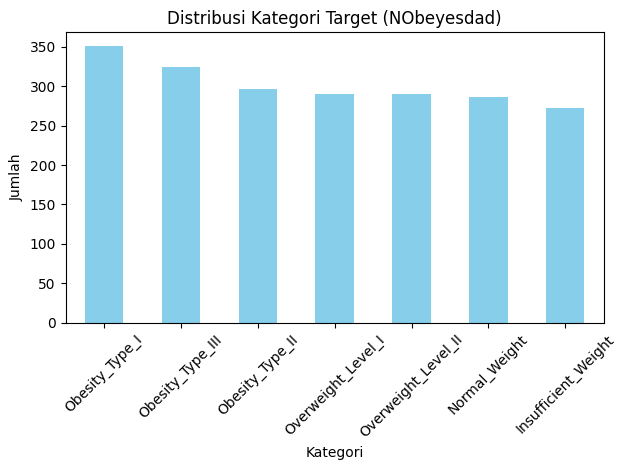

<ipython-input-65-3350249218>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')


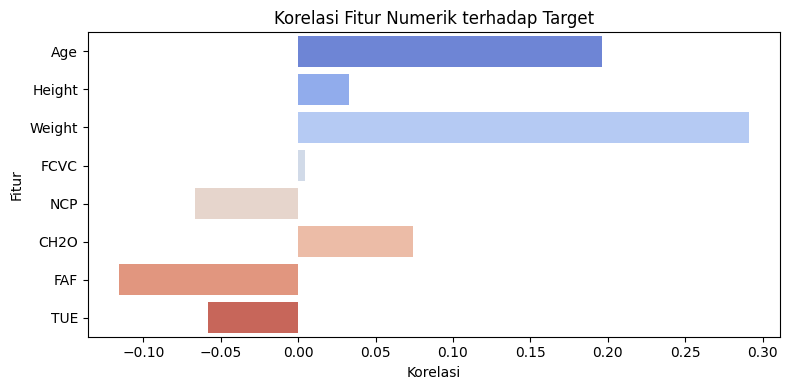

In [65]:
#Visualisasi distribusi target
y.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribusi Kategori Target (NObeyesdad)')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Hitung korelasi antara fitur dan target
encoded_target = y.astype('category').cat.codes
df_corr_all = X[numerical_cols].copy()
df_corr_all['target_encoded'] = encoded_target

corr_target = df_corr_all.corr(numeric_only=True)['target_encoded'].drop('target_encoded')

# Visualisasi korelasi terhadap target
plt.figure(figsize=(8, 4))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')
plt.title('Korelasi Fitur Numerik terhadap Target')
plt.xlabel('Korelasi')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()


Di Tahap Preprocessing ini tipe data yang salah dikonversi menjadi numerik, nilai yang hilang diisi menggunakan strategi median dan modus, lalu dilakukan one-hot encoding pada data kategorikal serta standard scaling pada data numerik.

# Modeling

In [66]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran data latih (X_train): {X_train.shape}")
print(f"Ukuran data uji (X_test):  {X_test.shape}")


Ukuran data latih (X_train): (1688, 31)
Ukuran data uji (X_test):  (423, 31)


In [67]:
# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}



--- Logistic Regression (Evaluasi Awal) ---
Akurasi: 0.7139
                     precision    recall  f1-score   support

Insufficient_Weight       0.74      0.96      0.84        54
      Normal_Weight       0.68      0.47      0.55        58
     Obesity_Type_I       0.64      0.69      0.66        70
    Obesity_Type_II       0.71      0.92      0.80        60
   Obesity_Type_III       0.90      0.98      0.94        65
 Overweight_Level_I       0.72      0.62      0.67        58
Overweight_Level_II       0.50      0.34      0.41        58

           accuracy                           0.71       423
          macro avg       0.70      0.71      0.70       423
       weighted avg       0.70      0.71      0.70       423



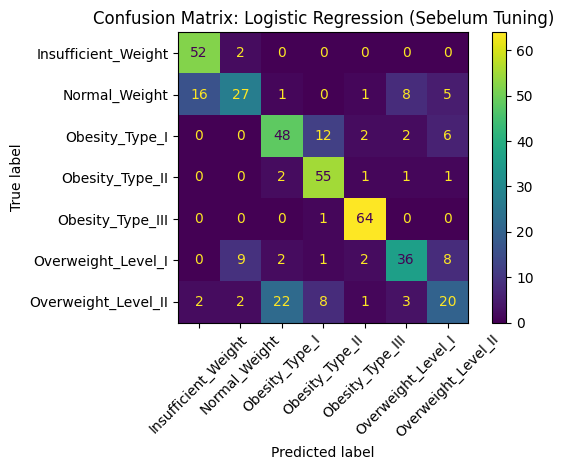


--- Random Forest (Evaluasi Awal) ---
Akurasi: 0.9267
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.77      0.91      0.83        58
     Obesity_Type_I       0.93      0.94      0.94        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.87      0.83      0.85        58
Overweight_Level_II       0.96      0.88      0.92        58

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423



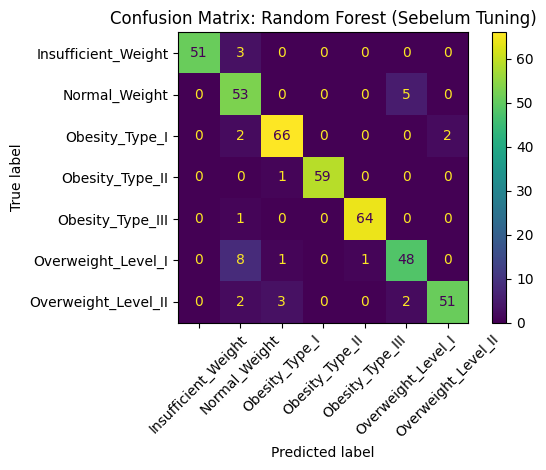


--- K-Nearest Neighbors (Evaluasi Awal) ---
Akurasi: 0.7896
                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.93      0.83        54
      Normal_Weight       0.60      0.45      0.51        58
     Obesity_Type_I       0.76      0.93      0.84        70
    Obesity_Type_II       0.88      0.95      0.91        60
   Obesity_Type_III       0.92      1.00      0.96        65
 Overweight_Level_I       0.74      0.59      0.65        58
Overweight_Level_II       0.80      0.64      0.71        58

           accuracy                           0.79       423
          macro avg       0.78      0.78      0.77       423
       weighted avg       0.78      0.79      0.78       423



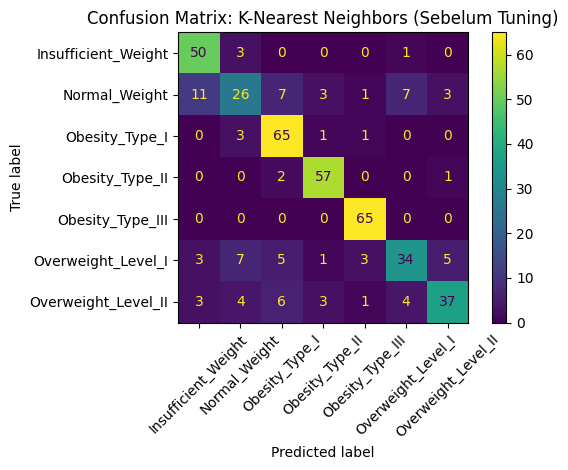

In [68]:
initial_accuracies = {}
# Latih setiap model
for name, model in models.items():
    print(f"\n--- {name} (Evaluasi Awal) ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    initial_accuracies[name] = accuracy

    print(f"Akurasi: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Tampilkan Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(xticks_rotation=45)
    plt.title(f'Confusion Matrix: {name} (Sebelum Tuning)')
    plt.tight_layout()
    plt.show()

<ipython-input-69-3812312575>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette='viridis')


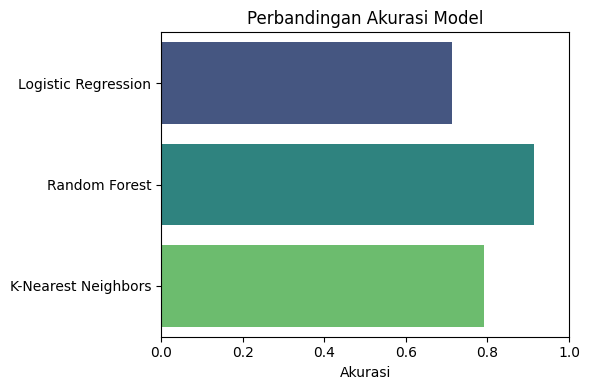

In [69]:
# Visualisasi akurasi model
plt.figure(figsize=(6, 4))
model_names = list(results.keys())
accuracies = [results[m]['accuracy'] for m in model_names]
sns.barplot(x=accuracies, y=model_names, palette='viridis')
plt.xlabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

Tiga model klasifikasi Logistic Regression, Random Forest, dan K-Nearest Neighbors (KNN) dilatih untuk mendapatkan performa awal. Hasil evaluasi menunjukkan bahwa Random Forest secara signifikan lebih unggul dengan akurasi awal mencapai ~92.7%.

#Hyperparameter tuning

In [70]:
# Grid untuk Logistic Regression dan KNN (menggunakan GridSearchCV)
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] # 1: Jarak Manhattan, 2: Jarak Euclidean
}

# Distribusi parameter untuk Random Forest (menggunakan RandomizedSearchCV)
param_dist_rf = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


--- Tuning Hyperparameter untuk Logistic Regression ---
Parameter Terbaik: {'C': 100, 'solver': 'lbfgs'}
Skor Akurasi Terbaik dari Cross-Validation: 0.7269

Laporan Klasifikasi di Test Set (Setelah Tuning):
Akurasi: 0.7258
                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.93      0.83        54
      Normal_Weight       0.67      0.48      0.56        58
     Obesity_Type_I       0.65      0.73      0.69        70
    Obesity_Type_II       0.73      0.92      0.81        60
   Obesity_Type_III       0.90      0.98      0.94        65
 Overweight_Level_I       0.73      0.62      0.67        58
Overweight_Level_II       0.56      0.40      0.46        58

           accuracy                           0.73       423
          macro avg       0.71      0.72      0.71       423
       weighted avg       0.72      0.73      0.71       423



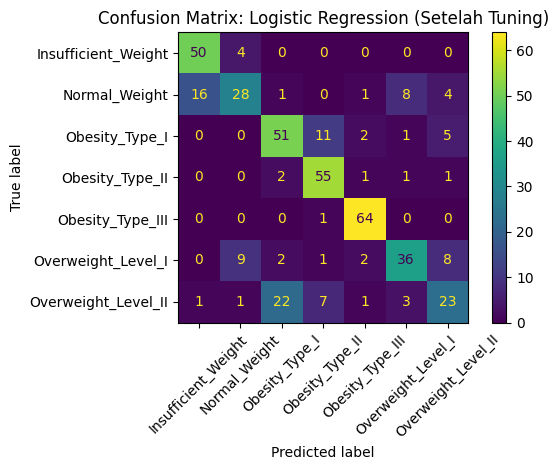


--- Tuning Hyperparameter untuk Random Forest ---
Parameter Terbaik: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Skor Akurasi Terbaik dari Cross-Validation: 0.9307

Laporan Klasifikasi di Test Set (Setelah Tuning):
Akurasi: 0.9291
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.76      0.95      0.85        58
     Obesity_Type_I       0.93      0.96      0.94        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.90      0.81      0.85        58
Overweight_Level_II       0.96      0.86      0.91        58

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.94      0.93      0.93       423



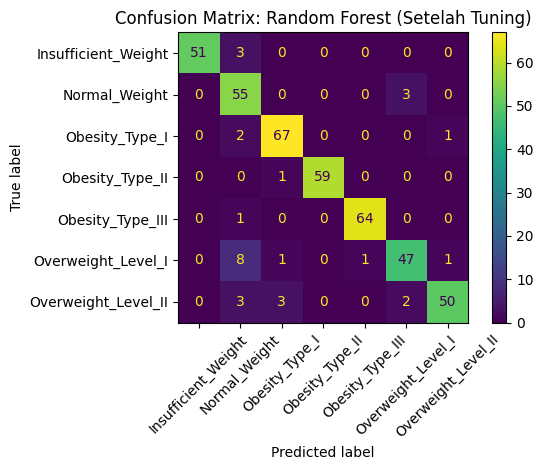


--- Tuning Hyperparameter untuk K-Nearest Neighbors ---
Parameter Terbaik: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Skor Akurasi Terbaik dari Cross-Validation: 0.8537

Laporan Klasifikasi di Test Set (Setelah Tuning):
Akurasi: 0.8629
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.91      0.92        54
      Normal_Weight       0.71      0.64      0.67        58
     Obesity_Type_I       0.86      0.94      0.90        70
    Obesity_Type_II       0.92      0.97      0.94        60
   Obesity_Type_III       0.94      0.98      0.96        65
 Overweight_Level_I       0.82      0.71      0.76        58
Overweight_Level_II       0.83      0.86      0.85        58

           accuracy                           0.86       423
          macro avg       0.86      0.86      0.86       423
       weighted avg       0.86      0.86      0.86       423



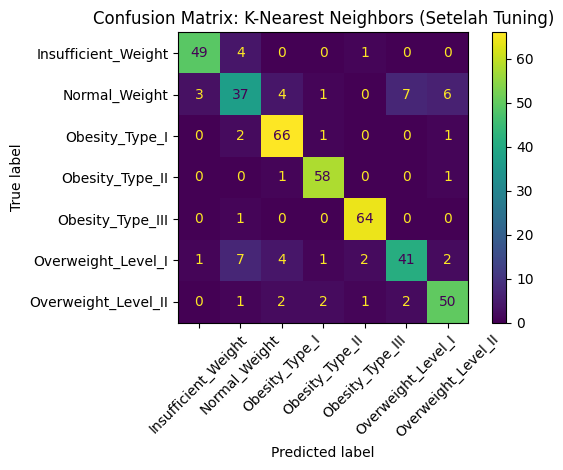

In [71]:
best_models = {}
tuned_accuracies = {}

# Inisialisasi pencarian parameter
searches = {
    'Logistic Regression': GridSearchCV(models['Logistic Regression'], param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1),
    'Random Forest': RandomizedSearchCV(models['Random Forest'], param_dist_rf, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42),
    'K-Nearest Neighbors': GridSearchCV(models['K-Nearest Neighbors'], param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
}

for name, search in searches.items():
    print(f"\n--- Tuning Hyperparameter untuk {name} ---")
    search.fit(X_train, y_train)

    print(f"Parameter Terbaik: {search.best_params_}")
    print(f"Skor Akurasi Terbaik dari Cross-Validation: {search.best_score_:.4f}")

    # Simpan model terbaik
    best_model = search.best_estimator_
    best_models[name] = best_model

    # Evaluasi pada data uji
    y_pred_best = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_best)
    tuned_accuracies[name] = accuracy

    print("\nLaporan Klasifikasi di Test Set (Setelah Tuning):")
    print(f"Akurasi: {accuracy:.4f}")
    print(classification_report(y_test, y_pred_best, zero_division=0))

    # Confusion Matrix untuk model yang sudah dituning
    cm = confusion_matrix(y_test, y_pred_best, labels=best_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
    disp.plot(xticks_rotation=45)
    plt.title(f'Confusion Matrix: {name} (Setelah Tuning)')
    plt.tight_layout()
    plt.show()


In [73]:
df_compare = pd.DataFrame({
    'Akurasi Sebelum Tuning': initial_accuracies,
    'Akurasi Setelah Tuning': tuned_accuracies
}).sort_values(by='Akurasi Setelah Tuning', ascending=False)

print("=== Tabel Perbandingan Performa Model ===")
display(df_compare)

# Menentukan model terbaik
best_model_name = df_compare.index[0]
best_accuracy = df_compare.iloc[0, 1]
print(f"\nModel terbaik setelah tuning adalah '{best_model_name}' dengan akurasi {best_accuracy:.4f} pada data uji.")


=== Tabel Perbandingan Performa Model ===


,Akurasi Sebelum Tuning,Akurasi Setelah Tuning
Random Forest,0.926714,0.929078
K-Nearest Neighbors,0.789598,0.862884
Logistic Regression,0.713948,0.725768



Model terbaik setelah tuning adalah 'Random Forest' dengan akurasi 0.9291 pada data uji.


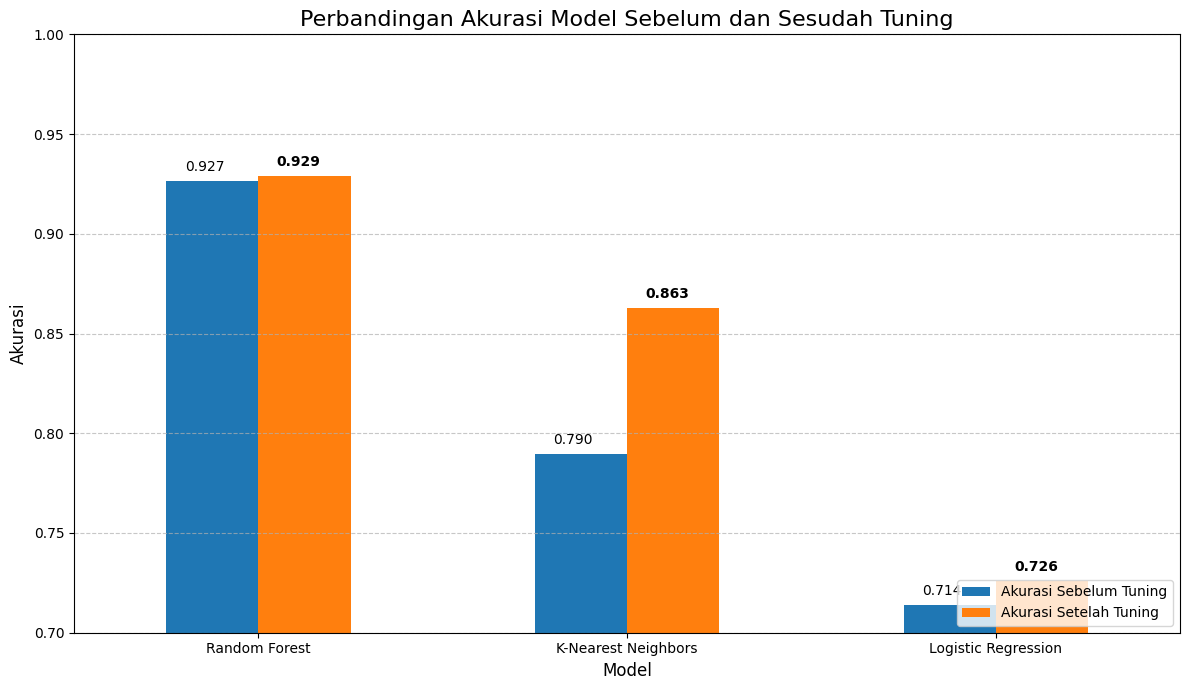

In [74]:
df_compare.plot(kind='bar', figsize=(12, 7))
plt.title('Perbandingan Akurasi Model Sebelum dan Sesudah Tuning', fontsize=16)
plt.ylabel('Akurasi', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0.7, 1.0) # Fokus pada rentang akurasi yang relevan
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')

# Menambahkan label nilai di atas setiap bar
for index, row in enumerate(df_compare.iterrows()):
    plt.text(index - 0.2, row[1]['Akurasi Sebelum Tuning'] + 0.005, f"{row[1]['Akurasi Sebelum Tuning']:.3f}", color='black')
    plt.text(index + 0.05, row[1]['Akurasi Setelah Tuning'] + 0.005, f"{row[1]['Akurasi Setelah Tuning']:.3f}", color='black', fontweight='bold')

plt.tight_layout()
plt.show()


Untuk optimasi, dilakukan Hyperparameter Tuning menggunakan GridSearchCV untuk Logistic Regression & KNN, serta RandomizedSearchCV yang lebih efisien untuk Random Forest. Hasilnya, Random Forest tetap menjadi model terbaik dengan akurasi akhir 92.91%, sementara K-Nearest Neighbors menunjukkan peningkatan paling drastis hingga 86.29%, dan Logistic Regression sedikit membaik. Ini membuktikan Random Forest sebagai model paling akurat dan andal untuk kasus ini.

# Simpan model

In [78]:
# Menyimpan model terbaik (Random Forest)
joblib.dump(best_models['Random Forest'], '/content/drive/MyDrive/Colab Notebooks/BengKod/random_forest_obesity_model.pkl')

# Menyimpan objek scaler yang telah di-fit pada data latih
joblib.dump(scaler, '/content/drive/MyDrive/Colab Notebooks/BengKod/scaler.pkl')

print("Model 'random_forest_obesity_model.pkl' dan scaler 'scaler.pkl' berhasil disimpan!")


Model 'random_forest_obesity_model.pkl' dan scaler 'scaler.pkl' berhasil disimpan!
